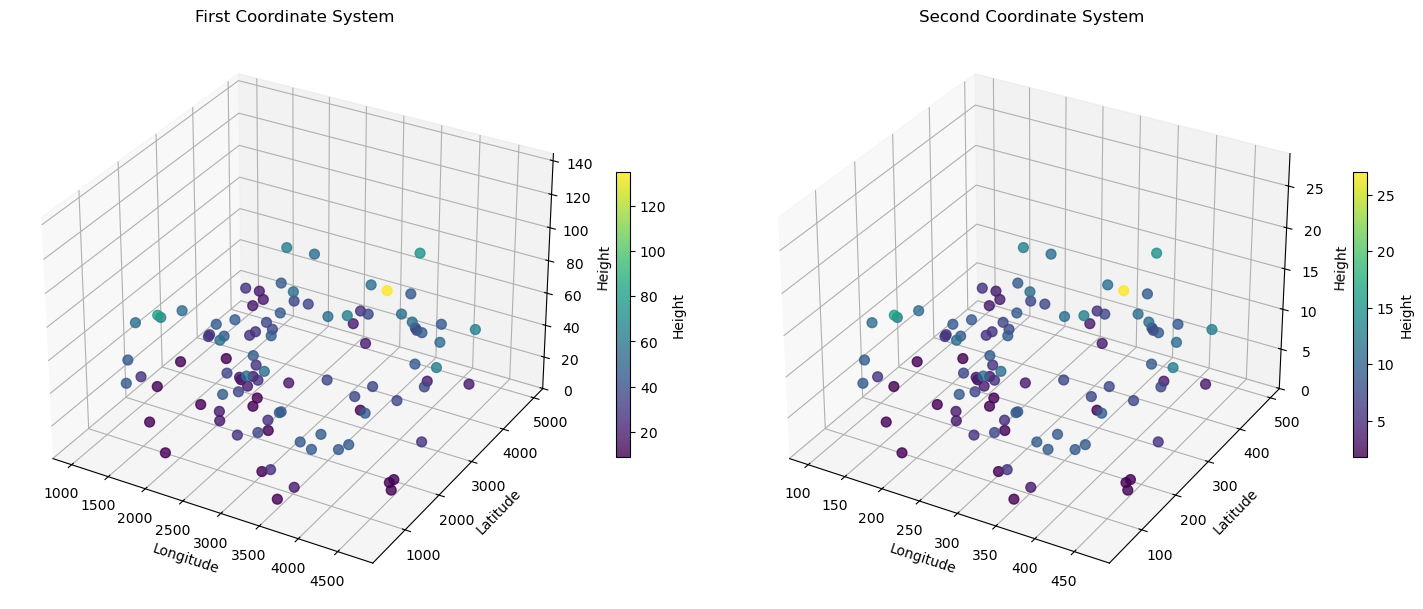

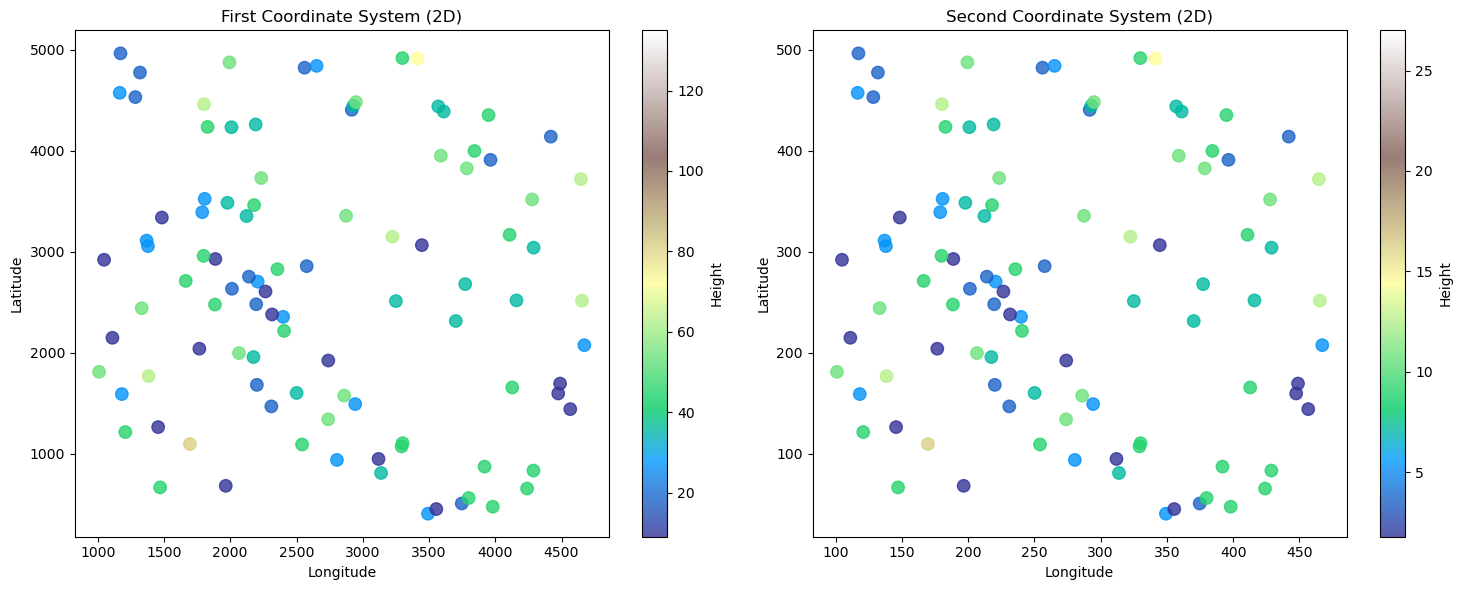

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the CSV file
file_path = 'Height Map.csv'
df = pd.read_csv(file_path)

# Clean column names and data
df.columns = ['Longitude(rad)1', 'Latitude(rad)1', 'Hight1', '', 'Longitude(rad)2', 'Latitude(rad)2', 'Hight2']

# Convert columns to numeric, removing any spaces
for col in df.columns:
    if col != '':  # Skip the empty column
        df[col] = pd.to_numeric(df[col].astype(str).str.strip())

# Create two subplots - one for each coordinate system
fig = plt.figure(figsize=(15, 6))

# First coordinate system
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    df['Longitude(rad)1'], 
    df['Latitude(rad)1'], 
    df['Hight1'],
    c=df['Hight1'],  # Color points by height
    cmap='viridis',
    s=50,
    alpha=0.8
)
ax1.set_title('First Coordinate System')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Height')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, label='Height')

# Second coordinate system
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(
    df['Longitude(rad)2'], 
    df['Latitude(rad)2'], 
    df['Hight2'],
    c=df['Hight2'],  # Color points by height
    cmap='viridis',
    s=50,
    alpha=0.8
)
ax2.set_title('Second Coordinate System')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Height')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, label='Height')

plt.tight_layout()
plt.show()

# 2D visualization with height represented by color
plt.figure(figsize=(15, 6))

# First coordinate system (2D)
plt.subplot(121)
plt.scatter(
    df['Longitude(rad)1'], 
    df['Latitude(rad)1'],
    c=df['Hight1'],
    cmap='terrain',
    s=80,
    alpha=0.8
)
plt.colorbar(label='Height')
plt.title('First Coordinate System (2D)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Second coordinate system (2D)
plt.subplot(122)
plt.scatter(
    df['Longitude(rad)2'], 
    df['Latitude(rad)2'],
    c=df['Hight2'], 
    cmap='terrain',
    s=80,
    alpha=0.8
)
plt.colorbar(label='Height')
plt.title('Second Coordinate System (2D)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

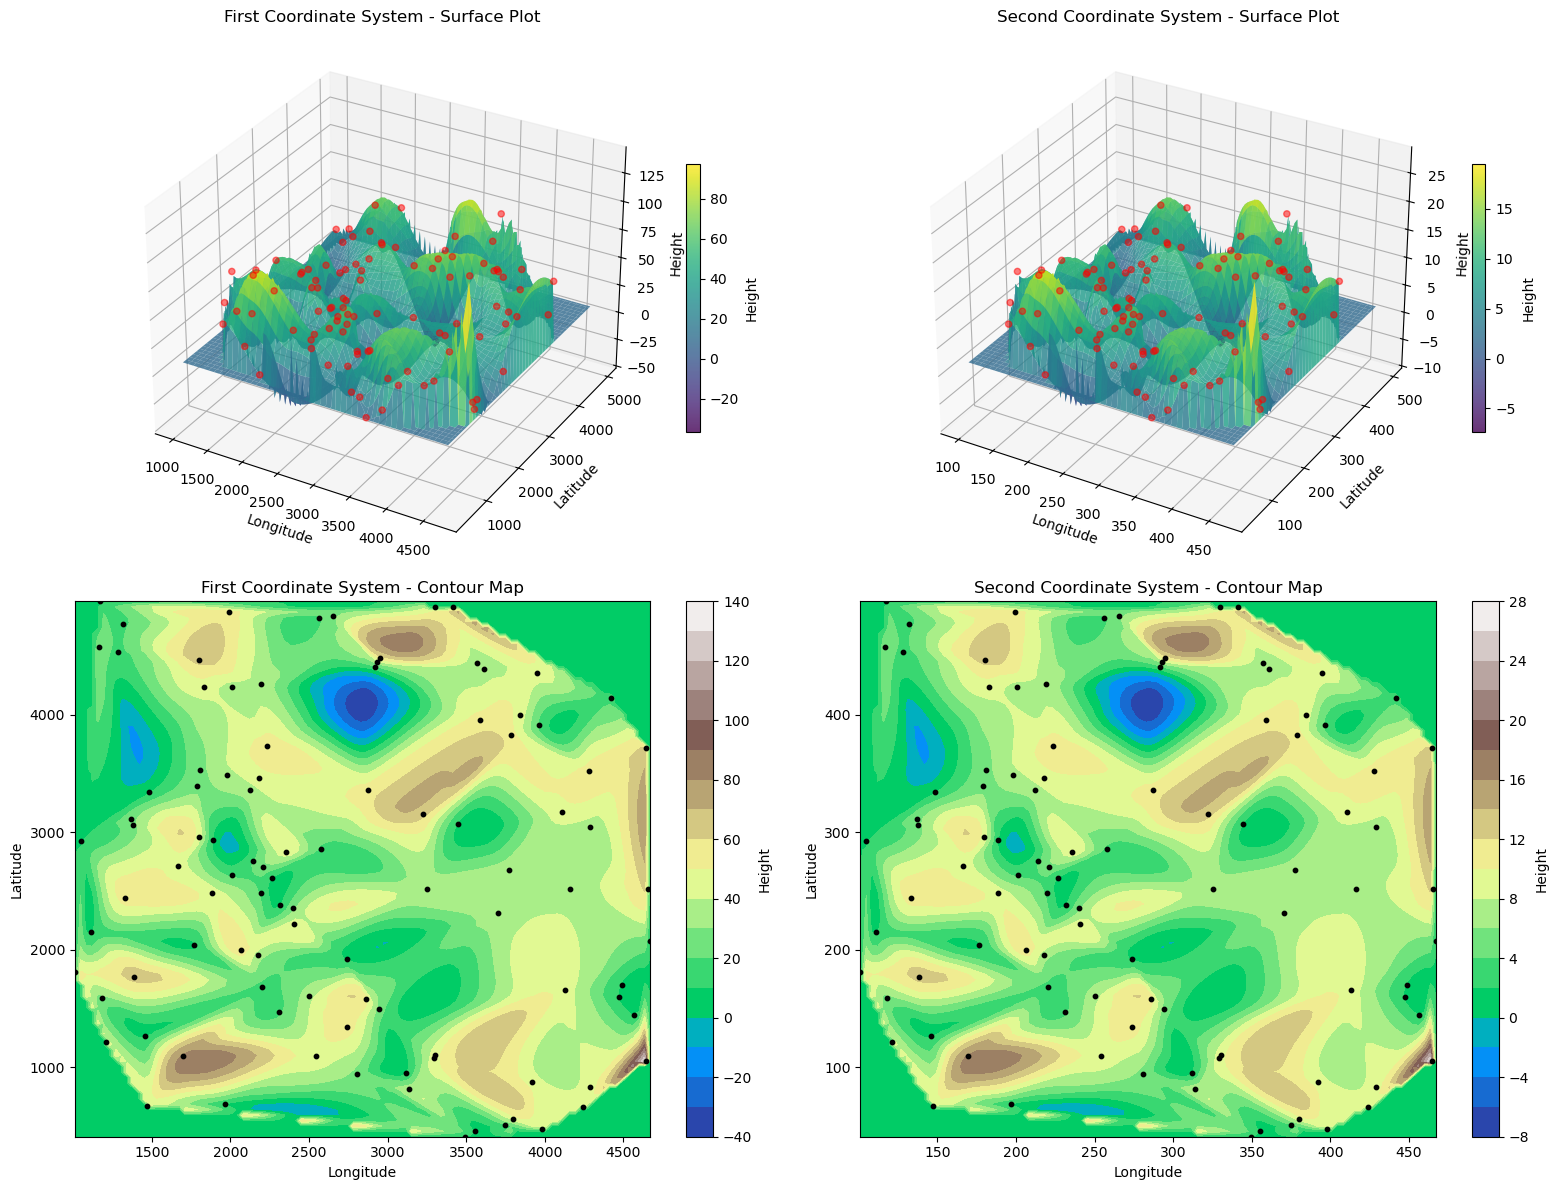

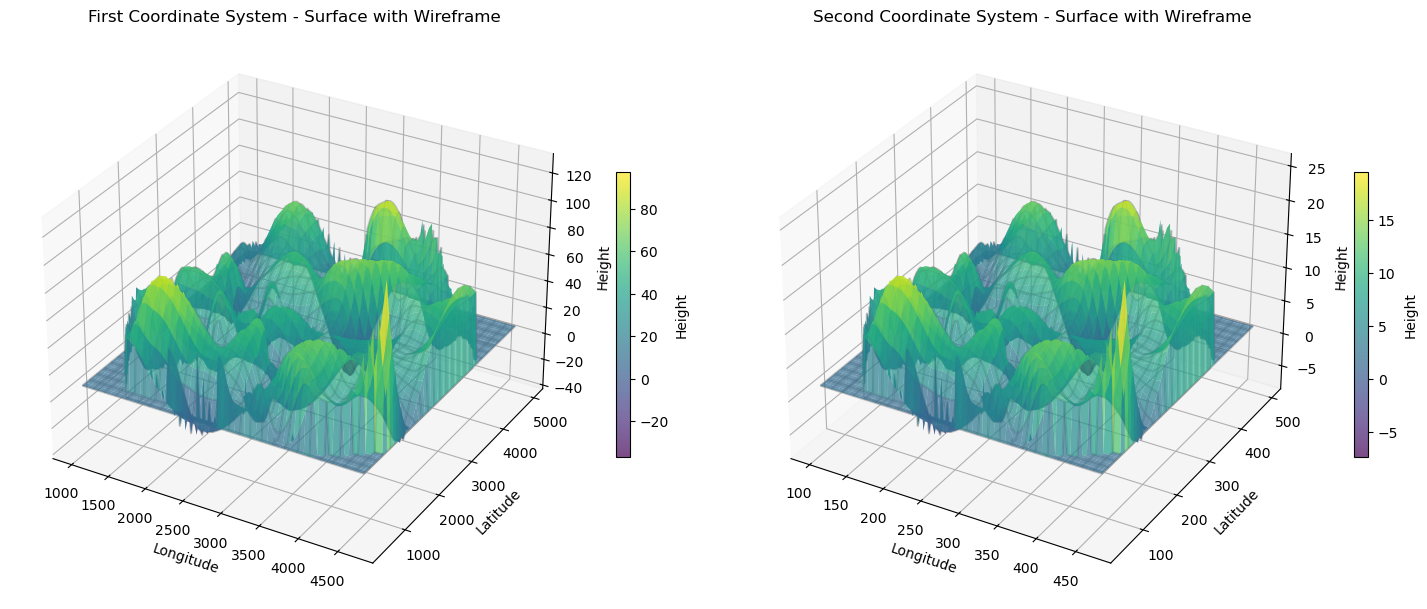

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Read the CSV file
file_path = 'Height Map.csv'
df = pd.read_csv(file_path)

# Clean column names and data
df.columns = ['Longitude(rad)1', 'Latitude(rad)1', 'Hight1', '', 'Longitude(rad)2', 'Latitude(rad)2', 'Hight2']

# Convert columns to numeric, removing any spaces
for col in df.columns:
    if col != '':  # Skip the empty column
        df[col] = pd.to_numeric(df[col].astype(str).str.strip())

# Create figure for 3D visualization
fig = plt.figure(figsize=(16, 12))

# First coordinate system - Surface plot with interpolation
ax1 = fig.add_subplot(221, projection='3d')

# Create grid for interpolation
x1 = df['Longitude(rad)1']
y1 = df['Latitude(rad)1']
z1 = df['Hight1']

# Create a regular grid
xi1 = np.linspace(min(x1), max(x1), 100)
yi1 = np.linspace(min(y1), max(y1), 100)
xi1_grid, yi1_grid = np.meshgrid(xi1, yi1)

# Interpolate height values
zi1_grid = griddata((x1, y1), z1, (xi1_grid, yi1_grid), method='cubic', fill_value=np.min(z1))

# Plot the surface
surf1 = ax1.plot_surface(xi1_grid, yi1_grid, zi1_grid, cmap='viridis', 
                         edgecolor='none', alpha=0.8)

# Also add original points as reference
ax1.scatter(x1, y1, z1, c='red', s=20, alpha=0.5)

ax1.set_title('First Coordinate System - Surface Plot')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Height')
fig.colorbar(surf1, ax=ax1, shrink=0.5, label='Height')

# Second coordinate system - Surface plot with interpolation
ax2 = fig.add_subplot(222, projection='3d')

# Create grid for interpolation
x2 = df['Longitude(rad)2']
y2 = df['Latitude(rad)2']
z2 = df['Hight2']

# Create a regular grid
xi2 = np.linspace(min(x2), max(x2), 100)
yi2 = np.linspace(min(y2), max(y2), 100)
xi2_grid, yi2_grid = np.meshgrid(xi2, yi2)

# Interpolate height values
zi2_grid = griddata((x2, y2), z2, (xi2_grid, yi2_grid), method='cubic', fill_value=np.min(z2))

# Plot the surface
surf2 = ax2.plot_surface(xi2_grid, yi2_grid, zi2_grid, cmap='viridis', 
                         edgecolor='none', alpha=0.8)

# Also add original points as reference
ax2.scatter(x2, y2, z2, c='red', s=20, alpha=0.5)

ax2.set_title('Second Coordinate System - Surface Plot')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Height')
fig.colorbar(surf2, ax=ax2, shrink=0.5, label='Height')

# 2D contour plots for better height visualization
ax3 = fig.add_subplot(223)
contour1 = ax3.contourf(xi1_grid, yi1_grid, zi1_grid, 20, cmap='terrain')
ax3.scatter(x1, y1, c='black', s=10)
ax3.set_title('First Coordinate System - Contour Map')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
fig.colorbar(contour1, ax=ax3, label='Height')

ax4 = fig.add_subplot(224)
contour2 = ax4.contourf(xi2_grid, yi2_grid, zi2_grid, 20, cmap='terrain')
ax4.scatter(x2, y2, c='black', s=10)
ax4.set_title('Second Coordinate System - Contour Map')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
fig.colorbar(contour2, ax=ax4, label='Height')

plt.tight_layout()
plt.show()

# Additional 3D visualization - Wireframe with surface
fig = plt.figure(figsize=(15, 6))

# First coordinate system
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(xi1_grid, yi1_grid, zi1_grid, color='gray', alpha=0.5, rstride=4, cstride=4)
surf1 = ax1.plot_surface(xi1_grid, yi1_grid, zi1_grid, cmap='viridis', 
                         edgecolor='none', alpha=0.7)
ax1.set_title('First Coordinate System - Surface with Wireframe')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Height')
fig.colorbar(surf1, ax=ax1, shrink=0.5, label='Height')

# Second coordinate system
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(xi2_grid, yi2_grid, zi2_grid, color='gray', alpha=0.5, rstride=4, cstride=4)
surf2 = ax2.plot_surface(xi2_grid, yi2_grid, zi2_grid, cmap='viridis', 
                         edgecolor='none', alpha=0.7)
ax2.set_title('Second Coordinate System - Surface with Wireframe')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Height')
fig.colorbar(surf2, ax=ax2, shrink=0.5, label='Height')

plt.tight_layout()
plt.show()

In [13]:
# 读取轨迹数据
# 读取'HM_recovery/ 下的 CSV 文件
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# 获取当前目录
current_directory = os.getcwd()
# 获取所有 CSV 文件的路径
csv_files = glob.glob(os.path.join(current_directory, 'HM_recovery', '*.csv'))
# 读取所有 CSV 文件并存储在一个列表中
trajectories = []
for file in csv_files:
    df = pd.read_csv(file)
    trajectories.append(df)
# 将所有数据框合并为一个数据框

print("轨迹数据读取完成")
print(f"读取到 {len(trajectories)} 个轨迹数据文件。")

轨迹数据读取完成
读取到 3 个轨迹数据文件。


In [14]:
trajectories[0].head()  # 显示第一个轨迹数据的前几行


,TimeStamp,POS_X,POS_Y,POS_Z
0,0.0,10,10,10
1,0.5,13,12,19
2,1.0,20,18,19
3,1.5,21,18,28
4,2.0,28,24,28


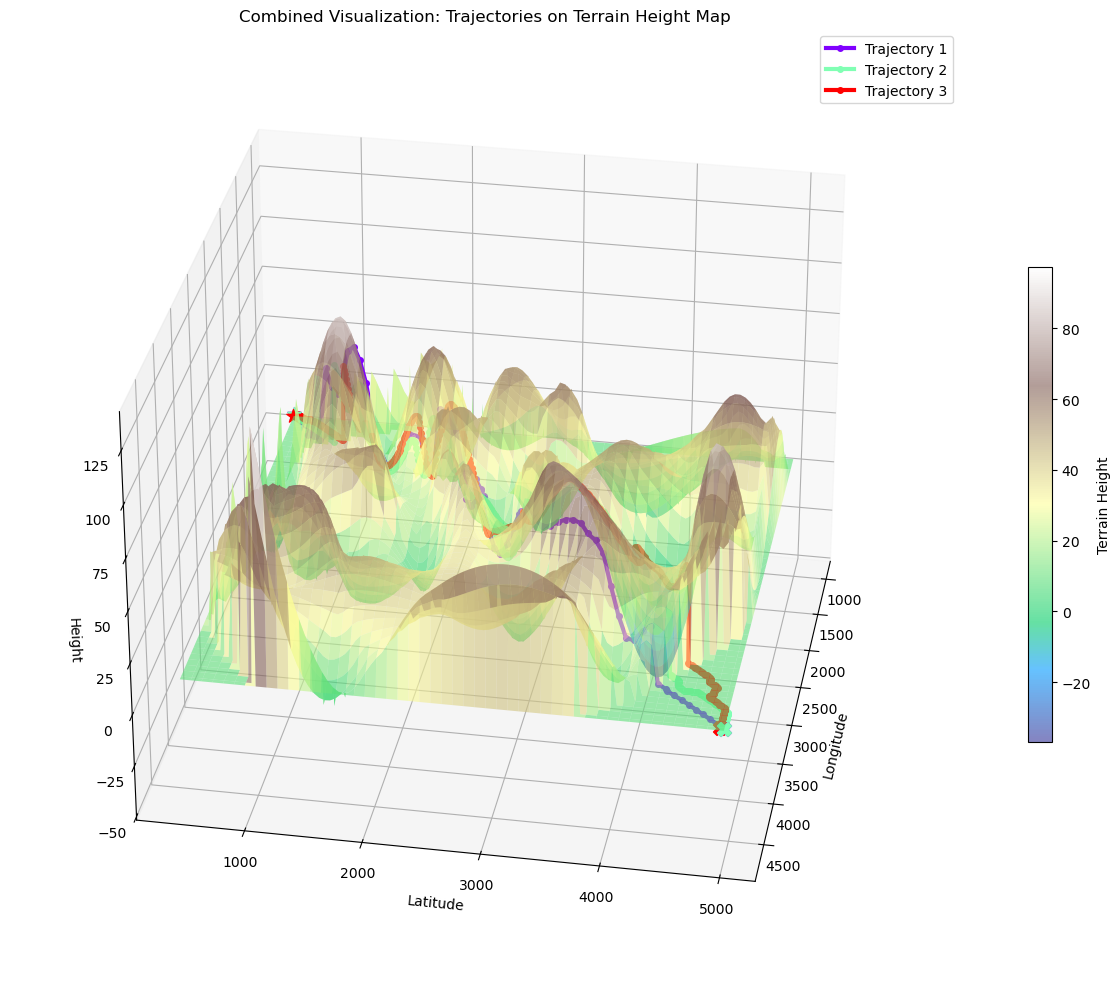

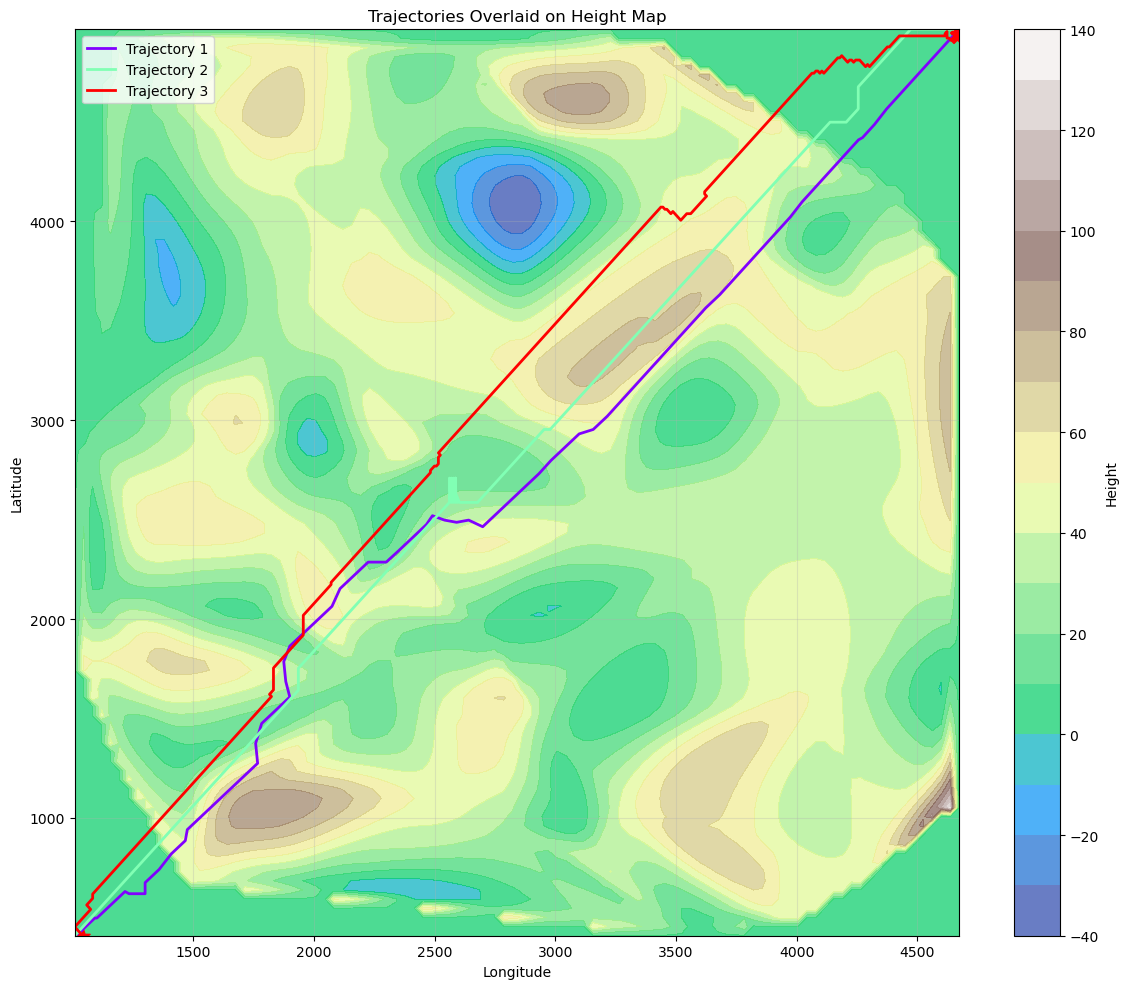

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import os
import glob
import matplotlib.cm as cm

# Read the height map
file_path = 'Height Map.csv'
df = pd.read_csv(file_path)

# Clean column names and data
df.columns = ['Longitude(rad)1', 'Latitude(rad)1', 'Hight1', '', 'Longitude(rad)2', 'Latitude(rad)2', 'Hight2']

# Convert columns to numeric
for col in df.columns:
    if col != '':
        df[col] = pd.to_numeric(df[col].astype(str).str.strip())

# Create grid for height map interpolation
x1 = df['Longitude(rad)1']
y1 = df['Latitude(rad)1']
z1 = df['Hight1']

xi1 = np.linspace(min(x1), max(x1), 100)
yi1 = np.linspace(min(y1), max(y1), 100)
xi1_grid, yi1_grid = np.meshgrid(xi1, yi1)
zi1_grid = griddata((x1, y1), z1, (xi1_grid, yi1_grid), method='cubic', fill_value=np.min(z1))

# Create a combined 3D visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot the height map as a surface with some transparency
surf = ax.plot_surface(xi1_grid, yi1_grid, zi1_grid, cmap='terrain', 
                      alpha=0.6, edgecolor='none')

# Add colorbar for height
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, label='Terrain Height')

# 2. Plot trajectories directly over the height map
colors = cm.rainbow(np.linspace(0, 1, len(trajectories)))
for i, traj in enumerate(trajectories):
    # Scale and shift trajectory coordinates to align with the height map
    x_pos = np.array(traj['POS_X'])
    y_pos = np.array(traj['POS_Y'])
    
    # Min-max normalization to map trajectory to height map coordinates
    x_scaled = (x_pos - x_pos.min()) / (x_pos.max() - x_pos.min()) * (max(x1) - min(x1)) + min(x1)
    y_scaled = (y_pos - y_pos.min()) / (y_pos.max() - y_pos.min()) * (max(y1) - min(y1)) + min(y1)
    
    # Sample heights from the terrain for each trajectory point
    z_terrain = griddata((x1, y1), z1, (x_scaled, y_scaled), method='cubic', fill_value=np.min(z1))
    
    # Plot the trajectory slightly above the terrain
    offset = 1.0  # Adjust this value to make the trajectory more visible
    ax.plot(x_scaled, y_scaled, z_terrain + offset, 
            linewidth=3, marker='o', markersize=4,
            label=f'Trajectory {i+1}', color=colors[i])
    
    # Mark start and end points - use array indexing instead of iloc
    ax.scatter(x_scaled[0], y_scaled[0], z_terrain[0] + offset,
                color=colors[i], s=100, marker='*')
    ax.scatter(x_scaled[-1], y_scaled[-1], z_terrain[-1] + offset,
                color=colors[i], s=100, marker='X')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height')
ax.set_title('Combined Visualization: Trajectories on Terrain Height Map')

# Add legend for a limited number of trajectories
if len(trajectories) <= 5:
    ax.legend(loc='upper right')
else:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:5], labels[:5], loc='upper right')
ax.view_init(elev=30, azim=10) 
plt.tight_layout()
plt.show()

# Alternative: 2D view with contours and trajectories
plt.figure(figsize=(12, 10))

# Plot contour map
contour = plt.contourf(xi1_grid, yi1_grid, zi1_grid, 20, cmap='terrain', alpha=0.7)
plt.colorbar(contour, label='Height')

# Plot trajectories with the same scaling as above
for i, traj in enumerate(trajectories):
    # Convert to numpy arrays for proper indexing
    x_pos = np.array(traj['POS_X'])
    y_pos = np.array(traj['POS_Y'])
    
    x_scaled = (x_pos - x_pos.min()) / (x_pos.max() - x_pos.min()) * (max(x1) - min(x1)) + min(x1)
    y_scaled = (y_pos - y_pos.min()) / (y_pos.max() - y_pos.min()) * (max(y1) - min(y1)) + min(y1)
    
    plt.plot(x_scaled, y_scaled, linewidth=2, color=colors[i], label=f'Trajectory {i+1}')
    
    # Use array indexing instead of iloc
    plt.scatter(x_scaled[0], y_scaled[0], color=colors[i], s=100, marker='*')
    plt.scatter(x_scaled[-1], y_scaled[-1], color=colors[i], s=100, marker='X')

plt.title('Trajectories Overlaid on Height Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)

# Add legend with limited entries
if len(trajectories) <= 5:
    plt.legend(loc='best')
else:
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:5], labels[:5], loc='best')

plt.tight_layout()
plt.show()